In [65]:
from __future__ import print_function
import matplotlib.pyplot as plt
from scipy import ndimage
import numpy as np
import os
import sys


%matplotlib inline

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log2
  from ipykernel import kernelapp as app


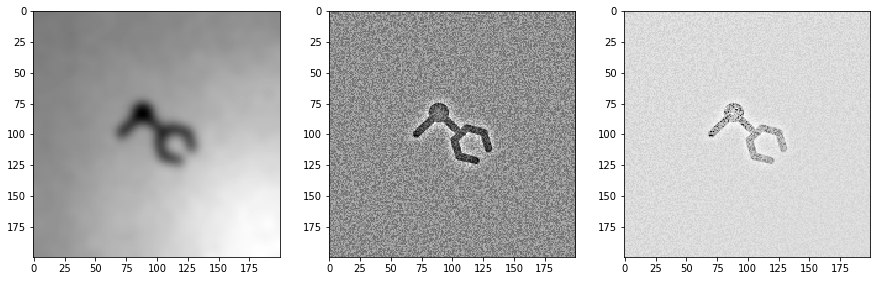

In [66]:
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import ndimage as nimg
import numpy as np
armsimg = img.imread('./data2/Arms/418.png')
gflt = nimg.gaussian_filter(armsimg, sigma = 4)
fig = plt.figure(figsize=(15, 10))
plt.subplot(131)
plt.imshow(gflt, cmap='gray')
plt.subplot(132)
plt.imshow(armsimg, cmap = 'gray')
plt.imshow((armsimg-gflt), cmap = 'gray')
maxValue = (armsimg - gflt).max()
minValue = (armsimg - gflt).min()
diff = np.log2(armsimg) - np.log2(gflt)
newImage = (diff-minValue)/(maxValue-minValue)


plt.subplot(133)
plt.imshow(newImage, cmap='gray')
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log2
  app.launch_new_instance()


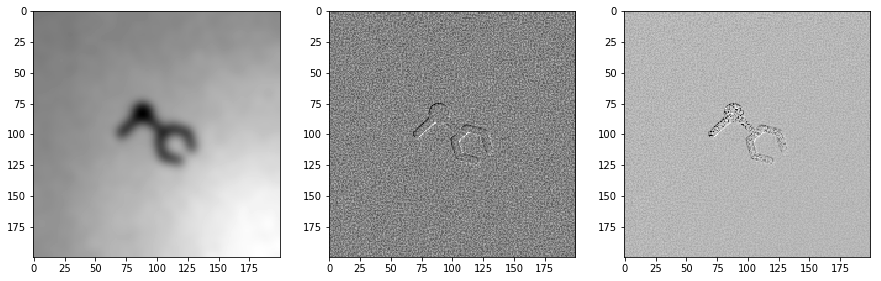

In [67]:

import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import ndimage as nimg 
import numpy as np
armsimg = img.imread('./data2/Arms/418.png')
med = nimg.median_filter(armsimg, 4)
fig = plt.figure(figsize=(15, 10))
plt.subplot(131)
plt.imshow(gflt, cmap='gray')
plt.subplot(132)
plt.imshow(armsimg, cmap = 'gray')
plt.imshow((armsimg-med), cmap = 'gray')
maxValue = (armsimg - med).max()
minValue = (armsimg - med).min()
diff = np.log2(armsimg) - np.log2(med)
newImage = (diff-minValue)/(maxValue-minValue)


plt.subplot(133)
plt.imshow(newImage, cmap='gray')
plt.show()

In [68]:
from PIL import Image
import os, sys

path = "./data2/Head"
dirs = os.listdir(path)

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((28,28), Image.ANTIALIAS)
            imResize.save(f + ' resized.png', 'PNG', quality=90)

resize()

In [69]:
#Modules Req
from PIL import Image
import glob
import os

#variables
FILETYPES = ['*.png']
NEWIMAGESIZE = 28

#funcs
def convert2jpg():
    for types in FILETYPES:
        openFiles = glob.glob(types)
        
        for files in openFiles:
            inFile = Image.open(files) 
            fileName = os.path.splitext(files)[0] #gets filename
            outFile = fileName + ".jpg" 
            inFile.save(outFile)
            print (fileName + " ... converted")
            
    print ("\n")
    return None

def delOldFileTypes():
    for types in FILETYPES:
        openFiles = glob.glob(types)
        
        for files in openFiles:
            os.remove(files)
            print (files + " ... deleted")
            
    print ("\n")
    return None
    

def resize(): 
    openFiles = glob.glob('*.jpg')
    
    for files in openFiles:
        inFile = Image.open(files)
        fileName = os.path.splitext(files)[0] #gets filename
        outFile = fileName + "new.jpg"
        print (fileName)
        print ("Original size ",inFile.size)
        xDim = inFile.size[0]
        yDim = inFile.size[1]        
        newSize = aspectRatio(xDim, yDim)       
        inFile = inFile.resize((int(newSize[0]),int(newSize[1])),Image.ANTIALIAS)
        inFile.save(outFile)
        print ("New Size ",inFile.size, "\n")
    return None

def aspectRatio(xDim, yDim):
    
    if xDim <= NEWIMAGESIZE and yDim <= NEWIMAGESIZE: #ensures images already correct size are not enlarged.
        return(xDim, yDim)
    
    elif xDim > yDim:
        divider = xDim/float(NEWIMAGESIZE)
        xDim = float(xDim/divider)
        yDim = float(yDim/divider)
        return(xDim, yDim)
        
    elif yDim > xDim:
        divider = yDim/float(NEWIMAGESIZE)
        xDim = float(xDim/divider)
        yDim = float(yDim/divider)
        return(xDim, yDim)
       
    elif xDim == yDim:
        xDim = NEWIMAGESIZE
        yDim = NEWIMAGESIZE
        return(xDim, yDim)

convert2jpg()
delOldFileTypes()
resize()


print ('All Done!!!')
#raw_inp('Images Resized... Press any key to continue')





All Done!!!


In [78]:
image_size = 50 # Pixel width and height.
size = image_size,image_size
pixel_depth = 255.0 # Number of levels per pixel.
sizes = [784,622,222,473]
folders = [
    r'data2//Arms//',
    r'data2//Figure_normal_legs//',
    r'data2//FigureWheels//',
    r'data2//Head//',
]

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      img = Image.open(image_file)
      newImg = img.resize(size, Image.ANTIALIAS)
      image_data = (np.array(newImg).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset

X_datasets = list()
print(X_datasets)
Y_datasets = list()
for idx in range(len(folders)):
    folder = folders[idx] 
    X_datasets.append(load_letter(folder, 200))
    labels = np.zeros((X_datasets[-1].shape[0],len(folders)))
    labels[:,idx] = 1
    Y_datasets.append(labels)
    

[]
data2//Arms//
Full dataset tensor: (784, 50, 50)
Mean: 0.112748
Standard deviation: 0.15943
data2//Figure_normal_legs//
Full dataset tensor: (0, 50, 50)
Mean: nan
Standard deviation: nan
data2//FigureWheels//


C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\User\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\User\Anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\User\Anaconda3\lib\site-packages\numpy\core\_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\User\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


Full dataset tensor: (222, 50, 50)
Mean: 0.0753042
Standard deviation: 0.184759
data2//Head//
Full dataset tensor: (473, 50, 50)
Mean: 0.0373346
Standard deviation: 0.210811


Total samples number: (1479, 50, 50)
Samples for tests: 370
Samples for trains: 1109


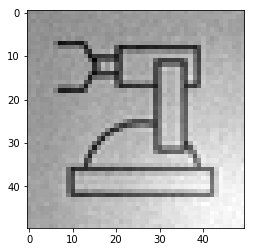

In [79]:
from sklearn.model_selection import train_test_split

X_datasets2 = np.concatenate(X_datasets)
Y_datasets2 = np.concatenate(Y_datasets)
print("Total samples number:",X_datasets2.shape)
X_trains,X_tests,Y_trains,Y_tests = train_test_split(X_datasets2,Y_datasets2,test_size=0.25)
print("Samples for tests:",Y_tests.shape[0])
print("Samples for trains:",Y_trains.shape[0])
plt.imshow(X_tests[0],cmap='gray')

In [80]:
#create 1st net Keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Reshape
from keras.callbacks import EarlyStopping,ModelCheckpoint
import numpy

callbacks = [
    EarlyStopping(monitor='val_loss', min_delta=0.00001, verbose=1),
    #earlyStop(monitor='val_loss', patience=2, verbose=0),
    ModelCheckpoint(filepath='./weights.net', verbose=1, save_best_only=True),
    
]

#fix random seed for reproduc...
seed = 7
numpy.random.seed(seed)

input_dim = X_trains[0].shape[0]*X_trains[0].shape[1]
print((X_trains[0].shape[0],X_trains[0].shape[1]))
print(Y_trains[0].shape[0])
#create model
model = Sequential()
model.add(Reshape((input_dim,), input_shape=(X_trains[0].shape[0],X_trains[0].shape[1])))
model.add(Dense(input_dim, input_shape = (input_dim,), init='uniform', activation='relu'))
model.add(Dense(int(input_dim/2), init='uniform', activation='relu'))
model.add(Dense(int(input_dim/4), init='uniform', activation='relu'))
model.add(Dense(int(input_dim/8), init='uniform', activation='relu'))
model.add(Dense(int(input_dim/16), init='uniform', activation='relu'))
model.add(Dense(Y_trains[0].shape[0],init='uniform', name="output"))
model.add(Activation('sigmoid', name="sigmoid"))
model.summary()

#compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#fit model
model.fit(X_trains, 
          Y_trains, 
          epochs=20, 
          batch_size=10, 
          verbose=2, 
          validation_split=0.25,
          callbacks=callbacks)
#calc predictions
results = model.evaluate(X_tests, Y_tests, batch_size=32, verbose=1, sample_weight=None)
#round predictions
print(results)

(50, 50)
4


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2500, input_shape=(2500,), activation="relu", kernel_initializer="uniform")`
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1250, activation="relu", kernel_initializer="uniform")`
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(625, activation="relu", kernel_initializer="uniform")`
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(312, activation="relu", kernel_initializer="uniform")`
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(156, activation="relu", kernel_initializer="uniform")`
C:\Users\User\Anaconda3\lib\site-pack

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_6 (Reshape)          (None, 2500)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 2500)              6252500   
_________________________________________________________________
dense_27 (Dense)             (None, 1250)              3126250   
_________________________________________________________________
dense_28 (Dense)             (None, 625)               781875    
_________________________________________________________________
dense_29 (Dense)             (None, 312)               195312    
_________________________________________________________________
dense_30 (Dense)             (None, 156)               48828     
_________________________________________________________________
output (Dense)               (None, 4)                 628       
__________

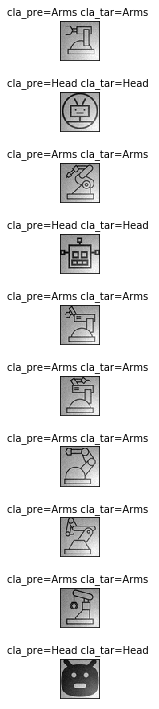

In [81]:

clazzez = ['Arms','Figure_normal_legs','FigureWheels','Head']
results = model.predict(X_tests)
errors = list()
for idx in range(len(results)):
    res = results[idx]
    cla_pre = clazzez[np.argmax(res)]
    cla_tar = clazzez[np.argmax(Y_tests[idx])]
    if cla_pre==cla_tar:
#out(cla_pre,cla_tar)
        errors.append(idx)
#out(errors)
problems = 10
fig, axes = plt.subplots(problems, figsize=(10,10))
fig.tight_layout()
for idx in range(problems):
    err = errors[idx]
    cla_pre = clazzez[np.argmax(results[err])]
    cla_tar = clazzez[np.argmax(Y_tests[err])]    
    
    axes[idx].imshow(X_tests[err],cmap='gray')
    axes[idx].set_title("cla_pre=%s cla_tar=%s " % (cla_pre,cla_tar), fontsize=10)
    axes[idx].set_xticks([]) 
    axes[idx].set_yticks([])